# Cluster flower species to find interesting patterns using k-means in Python
------------
This work is part of a collection of practice sets called [Machine Learning Starter](https://github.com/jamiemorales/project-machine-learning-starter).
It aims to help someone get started fast and gain a high-level understanding of the fundamental steps in the machine learning lifecycle early on.
After completion, someone will have built intuition over the machine learning lifecycle. 

## Step 0: Understand the problem
What we're trying to do here is to find strong and interesting patterns or similarities from the Iris data.

## Step 1: Set-up and understand data
This step helps uncover issues that we will want to address in the next step and take into account when building and evaluating our model. We also want to find interesting relationships or patterns that we can possibly leverage in solving the problem we specified.

In [1]:
# Set-up libraries
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Read-in data
df = pd.read_csv('../00-Datasets/iris.csv')

In [18]:
# Look at some details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
# Look at some records
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
# Check for missing values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [21]:
# Check for duplicate values
df.duplicated().sum()

0

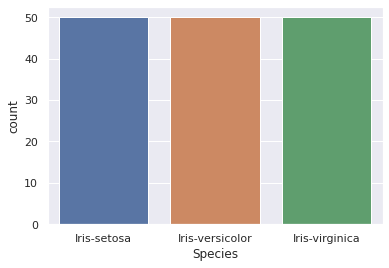

In [22]:
# Look at breakdown of label
df['Species'].value_counts()
sns.countplot(df['Species'])

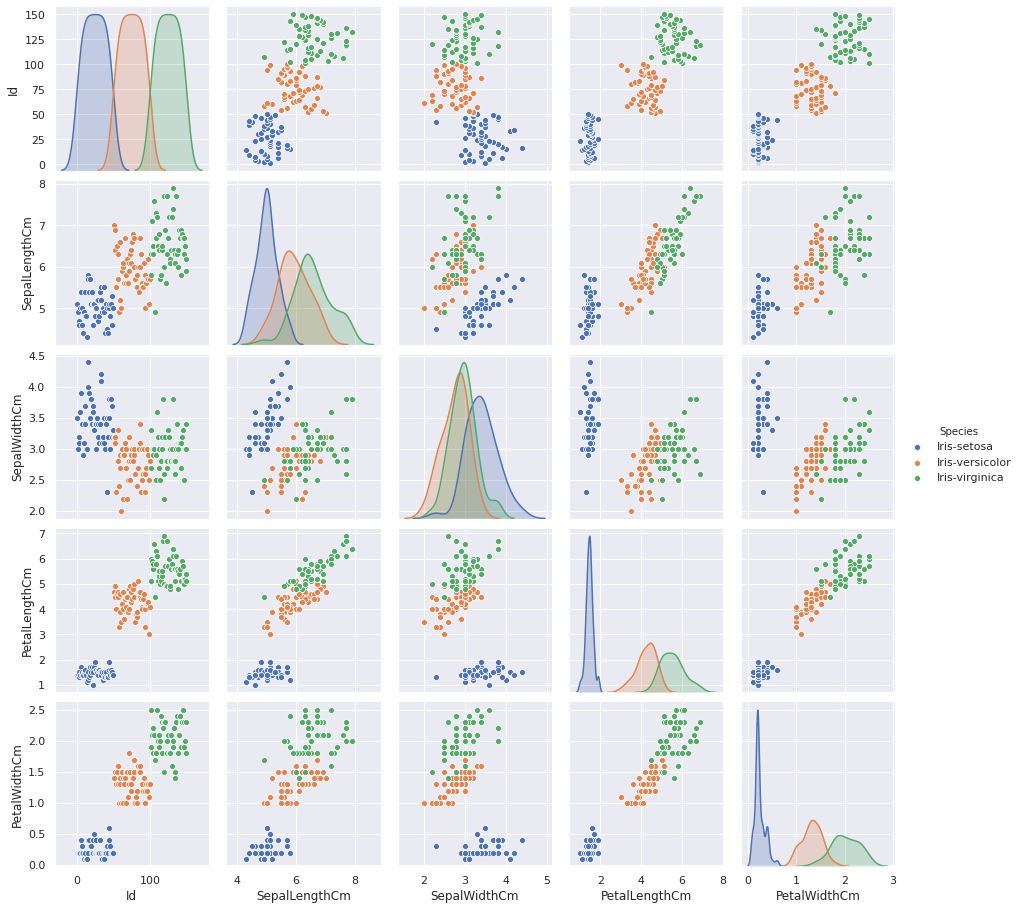

In [23]:
# Explore data visually
sns.pairplot(df, hue='Species')

In [24]:
# Summarise
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Step 2: Preprocess data and understand some more
This step typically takes the most time in the cycle but for our purposes, most of the datasets chosen in this series are clean.

Real-world datasets are noisy and incomplete. The choices we make in this step to address data issues can impact downstream steps and the result itself. For example, it can be tricky to address missing data when we don't know why it's missing. Is it missing completely at random or not? It can also be tricky to address outliers if we do not understand the domain and problem context enough.

In [25]:
# Get the features for input
X = df.drop('Species', axis=1)

## Step 3: Model and evaluate

We need to create a number of models with different k values, measure the performance of each model, and use the k with the best performance in our final model. 

Measure the performance. Where the ground truth is available, we compare the clusters generated to that of the ground truth.


In [26]:
# Build and fit models
wcss_scores = []
iterations = list(range(1,10))

for k in iterations:
    model = KMeans(n_clusters=k)
    model.fit(X)
    wcss_scores.append(model.inertia_)

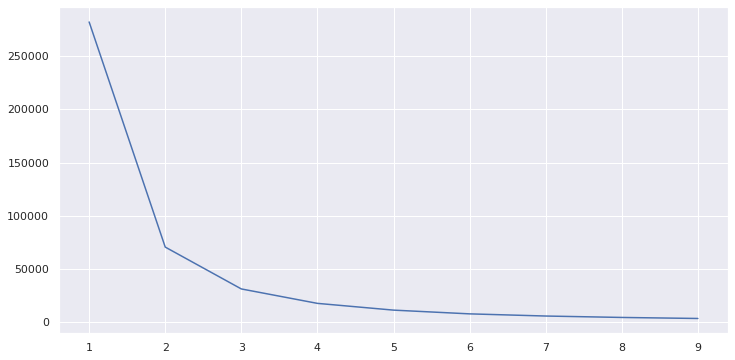

In [27]:
# Plot performances
plt.figure(figsize=(12,6))
sns.lineplot(x=iterations, y=wcss_scores)

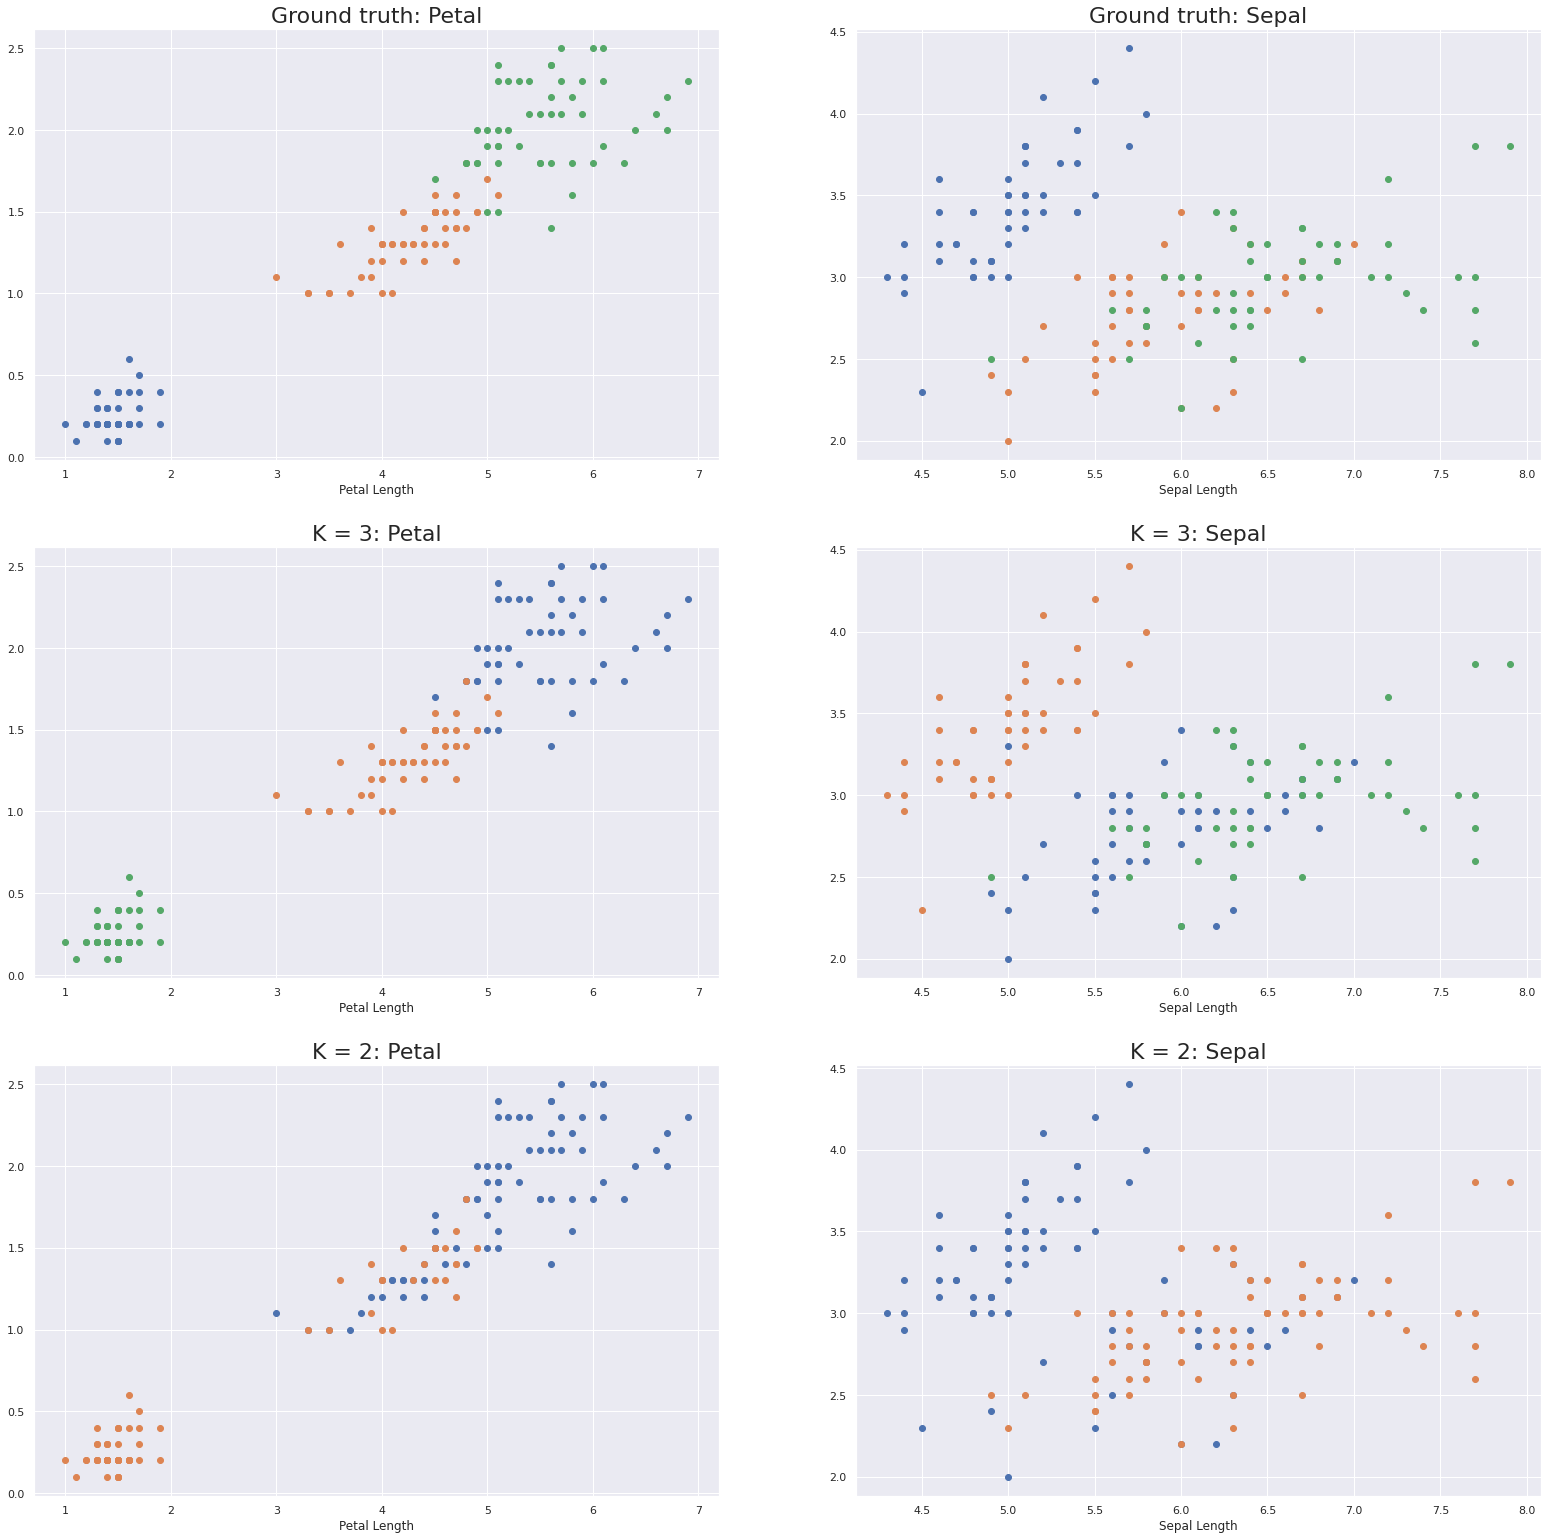

In [28]:
# Compare ground truth and cluster labels visually

plt.figure(figsize=(27,27))

plt.subplot(3,2,1)
plt.title('Ground truth: Petal',fontsize=22)
plt.xlabel('Petal Width')
plt.xlabel('Petal Length')
plt.scatter(df.PetalLengthCm[df.Species == "Iris-setosa"],
            df.PetalWidthCm[df.Species == "Iris-setosa"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-versicolor"],
            df.PetalWidthCm[df.Species == "Iris-versicolor"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-virginica"],
            df.PetalWidthCm[df.Species == "Iris-virginica"])

plt.subplot(3,2,2)
plt.title('Ground truth: Sepal',fontsize=22)
plt.xlabel('Sepal Width')
plt.xlabel('Sepal Length')
plt.scatter(df.SepalLengthCm[df.Species == "Iris-setosa"],
            df.SepalWidthCm[df.Species == "Iris-setosa"])
plt.scatter(df.SepalLengthCm[df.Species == "Iris-versicolor"],
            df.SepalWidthCm[df.Species == "Iris-versicolor"])
plt.scatter(df.SepalLengthCm[df.Species == "Iris-virginica"],
            df.SepalWidthCm[df.Species == "Iris-virginica"])

plt.subplot(3,2,3)
plt.title('K = 3: Petal',fontsize=22)
plt.xlabel('Petal Width')
plt.xlabel('Petal Length')
model = KMeans(n_clusters=3)
X['labels'] = model.fit_predict(X)
plt.scatter(X.PetalLengthCm[X.labels == 0], X.PetalWidthCm[X.labels == 0])
plt.scatter(X.PetalLengthCm[X.labels == 1], X.PetalWidthCm[X.labels == 1])
plt.scatter(X.PetalLengthCm[X.labels == 2], X.PetalWidthCm[X.labels == 2])

plt.subplot(3,2,4)
plt.title('K = 3: Sepal',fontsize=22)
plt.xlabel('Sepal Width')
plt.xlabel('Sepal Length')
model = KMeans(n_clusters=3)
X['labels'] = model.fit_predict(X)
plt.scatter(X.SepalLengthCm[X.labels == 0], X.SepalWidthCm[X.labels == 0])
plt.scatter(X.SepalLengthCm[X.labels == 1], X.SepalWidthCm[X.labels == 1])
plt.scatter(X.SepalLengthCm[X.labels == 2], X.SepalWidthCm[X.labels == 2])

plt.subplot(3,2,5)
plt.title('K = 2: Petal',fontsize=22)
plt.xlabel('Petal Width')
plt.xlabel('Petal Length')
model = KMeans(n_clusters=2)
X['labels'] = model.fit_predict(X)
plt.scatter(X.PetalLengthCm[X.labels == 0], X.PetalWidthCm[X.labels == 0])
plt.scatter(X.PetalLengthCm[X.labels == 1], X.PetalWidthCm[X.labels == 1])

plt.subplot(3,2,6)
plt.title('K = 2: Sepal',fontsize=22)
plt.xlabel('Sepal Width')
plt.xlabel('Sepal Length')
model = KMeans(n_clusters=2)
X['labels'] = model.fit_predict(X)
plt.scatter(X.SepalLengthCm[X.labels == 0], X.SepalWidthCm[X.labels == 0])
plt.scatter(X.SepalLengthCm[X.labels == 1], X.SepalWidthCm[X.labels == 1])

## More

If you found this work interesting, you might like:

* Machine Learning Starter

* Deep Learning Starter

* Natural Language Processing Starter

You can find more at [github.com/jamiemorales](https://github.com/jamiemorales).

Datasets are not mine. List of sources: [datasets and sources](https://github.com/jamiemorales/project-machine-learning-starter/blob/master/00-Datasets/Data%20sources.txt)

For sharing this work, here's how / the license: https://creativecommons.org/licenses/by-sa/4.0/